In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
candy = pd.read_csv('../dados/candy_production.csv')

In [3]:
candy.tail(12)

,observation_date,industrial_production
536,2016-09-01,109.3191
537,2016-10-01,119.0502
538,2016-11-01,116.8431
539,2016-12-01,116.4535
540,2017-01-01,109.4666
541,2017-02-01,113.4661
542,2017-03-01,105.2245
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022


In [4]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   observation_date       548 non-null    object 
 1   industrial_production  548 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [5]:
candy['observation_date'] = pd.to_datetime(candy['observation_date'])

In [6]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   observation_date       548 non-null    datetime64[ns]
 1   industrial_production  548 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


<Axes: xlabel='observation_date'>

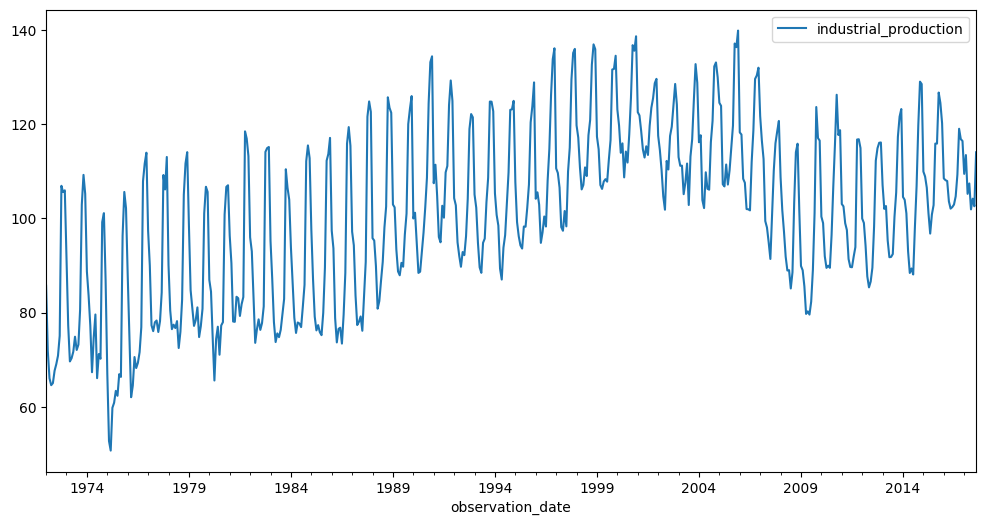

In [9]:
candy.plot(x='observation_date', y='industrial_production', figsize=(12, 6))

In [10]:
candy_filtered = candy[candy['observation_date'] >= '2010-01-01']

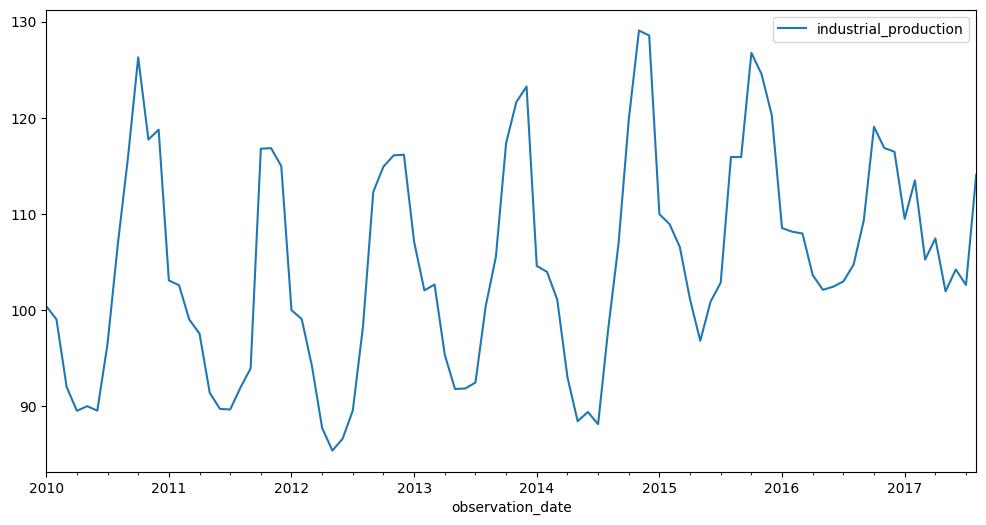

In [11]:
ax = candy_filtered.plot(x='observation_date', y='industrial_production', figsize=(12, 6))

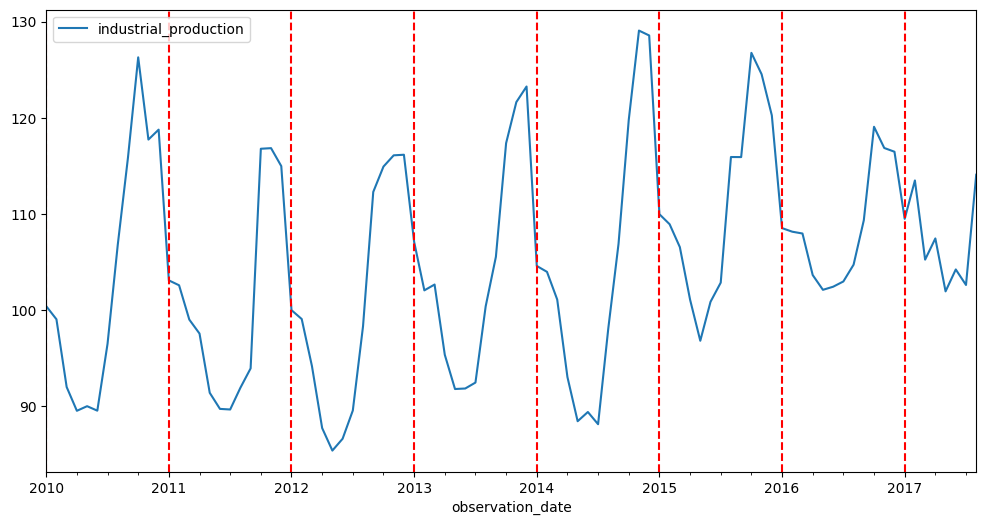

In [12]:
ax = candy_filtered.plot(x='observation_date', y='industrial_production', figsize=(12, 6))
xcoods = ['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
for xt in xcoods:
    plt.axvline(x=xt, color='r', linestyle='--')

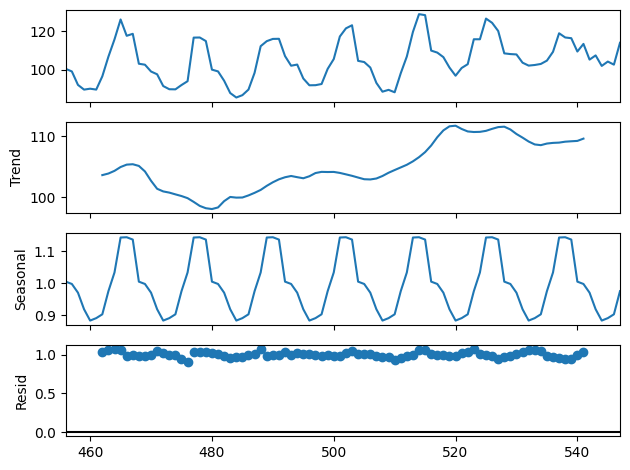

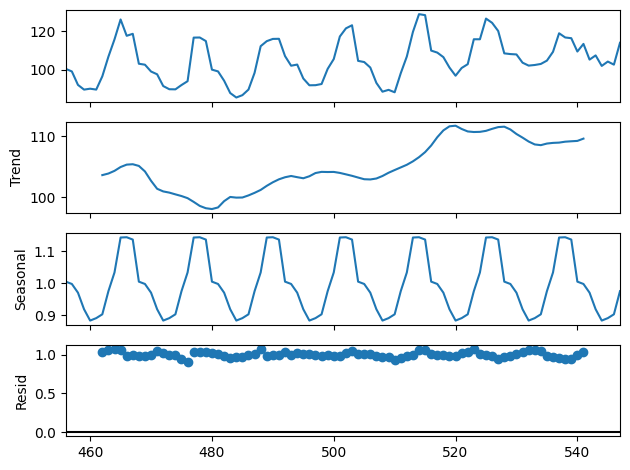

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
analysis = candy_filtered[['industrial_production']].copy()
decompose_result = seasonal_decompose(analysis, model='multiplicative', period=12)
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid
decompose_result.plot()